# **Time Series Analysis of Daily Electricity Consumption**

### **Focus:**
1. Basic time series handling using pandas
2. Convert to datetime, set datetime index
3. Perform resampling and slicing
### **Objective:**
4. Analyze electricity consumption patterns over time using datetime-aware methods. Focus on resampling (daily, weekly, monthly), and slicing time ranges.
### **Skills Practiced:**
5. pd.to_datetime() conversion
6. Setting datetime index
7. Time-based slicing (df.loc['2020-01'], etc.)
8. Resampling (resample('M'), resample('W'))
9. Plotting simple trends

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
!pip install xlrd

In [81]:
!pip install openpyxl

In [82]:
path = r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\data\household_power_consumption.txt"
df = pd.read_csv(path, sep=";")
df =pd.DataFrame(df)
df

C:\Users\bbuser\AppData\Local\Temp\ipykernel_25308\2114815923.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [83]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## **Conversion to datetime**

In [85]:
#I will use (pd.to_datetime()) to convert date to date time
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] 

C:\Users\bbuser\AppData\Local\Temp\ipykernel_25308\1537892726.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


0         2006-12-16
1         2006-12-16
2         2006-12-16
3         2006-12-16
4         2006-12-16
             ...    
2075254   2010-11-26
2075255   2010-11-26
2075256   2010-11-26
2075257   2010-11-26
2075258   2010-11-26
Name: Date, Length: 2075259, dtype: datetime64[ns]

## **Setting Datetime Index**

In [86]:
#To do slicing , first I have to set datetime Index
df = df.set_index('Date')
print(df.head())
print(df.index)

                Time Global_active_power Global_reactive_power  Voltage  \
Date                                                                      
2006-12-16  17:24:00               4.216                 0.418  234.840   
2006-12-16  17:25:00               5.360                 0.436  233.630   
2006-12-16  17:26:00               5.374                 0.498  233.290   
2006-12-16  17:27:00               5.388                 0.502  233.740   
2006-12-16  17:28:00               3.666                 0.528  235.680   

           Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
Date                                                                       
2006-12-16           18.400          0.000          1.000            17.0  
2006-12-16           23.000          0.000          1.000            16.0  
2006-12-16           23.000          0.000          2.000            17.0  
2006-12-16           23.000          0.000          1.000            17.0  
2006-12-16        

## **Time based Sclicing**

In [110]:
# now I will create a longer time series
dates = pd.date_range(start='2006-12-16', periods=10, freq='D')
values = np.random.randint(10, 30, size=10)
df = pd.DataFrame({'Value': values}, index=dates)
df

,Value
2006-12-16,14
2006-12-17,17
2006-12-18,23
2006-12-19,27
2006-12-20,14
2006-12-21,14
2006-12-22,23
2006-12-23,21
2006-12-24,25
2006-12-25,23


#### **Slicing by date**

In [95]:
#Then I do sclicing by date
df.loc[('2006-12-16 ')]

Value    11
Name: 2006-12-16 00:00:00, dtype: int32

#### **Slicing by month**

In [106]:
df.loc[('2006-12')]

,Value
2006-12-16,11
2006-12-17,14
2006-12-18,29
2006-12-19,20
2006-12-20,23
2006-12-21,13
2006-12-22,21
2006-12-23,25
2006-12-24,26
2006-12-25,27


#### **Slicing by year**

In [94]:
df.loc[('2006')]

,Value
2006-12-16,11
2006-12-17,14
2006-12-18,29
2006-12-19,20
2006-12-20,23
2006-12-21,13
2006-12-22,21
2006-12-23,25
2006-12-24,26
2006-12-25,27


## **Resampling**

### **Resample by week**

In [97]:
# Resample to weekly frequency, taking the sum
df_weekly_sum = df.resample('W').sum()
df_weekly_sum 

,Value
2006-12-17,25
2006-12-24,157
2006-12-31,27


### **Resample by month**

In [98]:
# Resample to monthly frequency, taking the mean
df_monthly_mean = df.resample('M').mean()
df_monthly_mean

C:\Users\bbuser\AppData\Local\Temp\ipykernel_25308\3214720338.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_mean = df.resample('M').mean()


,Value
2006-12-31,20.9


## **Plotting**

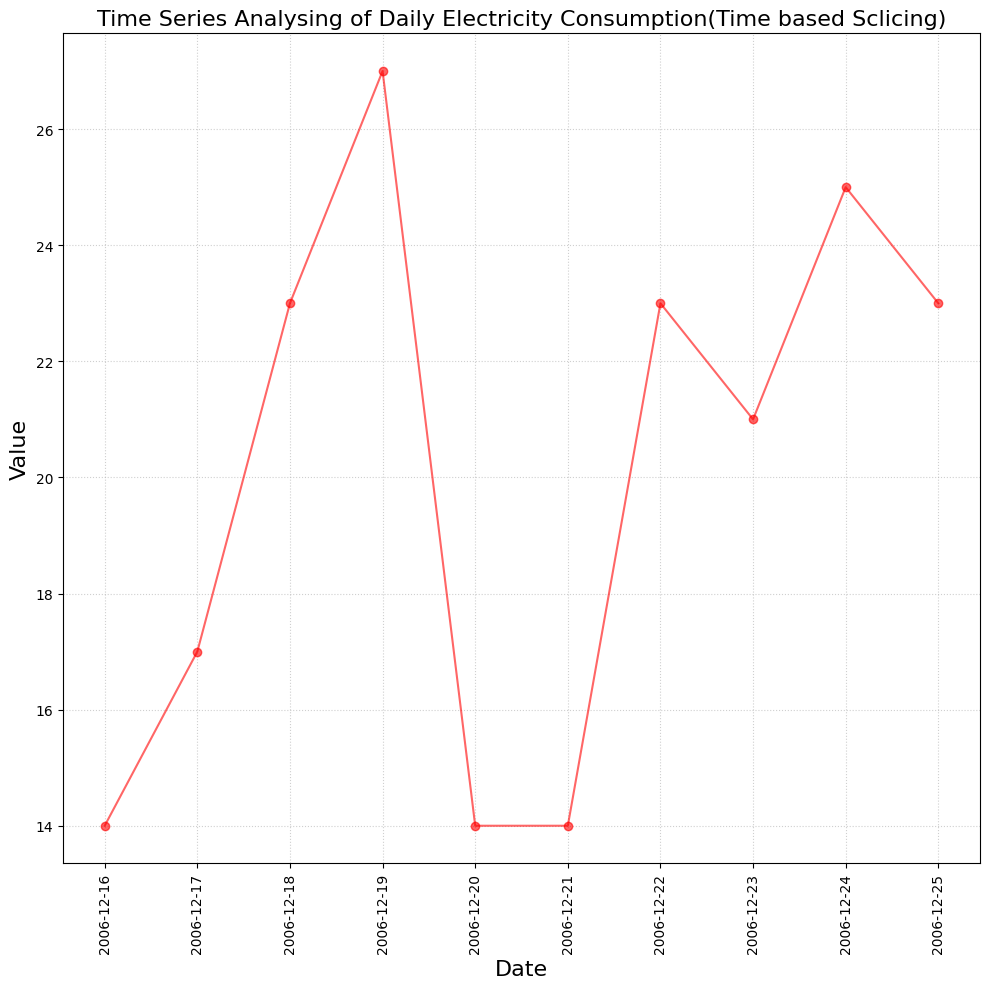

In [120]:
plt.figure(figsize=(10, 10))
plt.plot(df.index, df['Value'], marker='o', linestyle='-', color='red', alpha=0.6)
plt.title('Time Series Analysing of Daily Electricity Consumption(Time based Sclicing)', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Value', fontsize=16)
plt.grid(True, linestyle = ':', alpha=0.6)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()
